In [3]:
#!/usr/bin/env python3
"""
Implementación Completa de Algoritmo de Detección de Fake News
Incluye todas las métricas especializadas y pipeline completo
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings('ignore')

# =============================================
# 1. EXTRACCIÓN DE CARACTERÍSTICAS AVANZADA
# =============================================

class AdvancedFeatureExtractor:
    def __init__(self):
        self.vectorizer = TfidfVectorizer(
            max_features=5000,
            ngram_range=(1, 3),
            stop_words='english',
            lowercase=True
        )
        self.fitted = False

    def extract_linguistic_features(self, texts):
        """
        Extrae características linguísticas específicas para fake news
        """
        features_list = []

        for text in texts:
            features = {}

            # Características básicas
            features['text_length'] = len(text)
            features['word_count'] = len(text.split())
            features['avg_word_length'] = np.mean([len(word) for word in text.split()]) if text.split() else 0
            features['sentence_count'] = text.count('.') + text.count('!') + text.count('?')

            # Características específicas de fake news
            urgent_words = ['urgent', 'breaking', 'alert', 'emergency', 'immediate', 'asap']
            clickbait_words = ['shocking', 'amazing', 'unbelievable', 'incredible', 'secret', 'hidden', 'revealed']
            conspiracy_words = ['cover-up', 'conspiracy', 'mainstream media', 'they dont want', 'censored']
            emotional_words = ['outrageous', 'devastating', 'terrifying', 'miraculous', 'stunning']

            text_lower = text.lower()
            features['urgent_words_count'] = sum(1 for word in urgent_words if word in text_lower)
            features['clickbait_words_count'] = sum(1 for word in clickbait_words if word in text_lower)
            features['conspiracy_words_count'] = sum(1 for word in conspiracy_words if word in text_lower)
            features['emotional_words_count'] = sum(1 for word in emotional_words if word in text_lower)

            # Características de puntuación
            features['exclamation_count'] = text.count('!')
            features['question_count'] = text.count('?')
            features['caps_count'] = sum(1 for c in text if c.isupper())
            features['exclamation_ratio'] = features['exclamation_count'] / len(text) if len(text) > 0 else 0
            features['caps_ratio'] = features['caps_count'] / len(text) if len(text) > 0 else 0

            # Características de mayúsculas consecutivas
            caps_sequences = len([word for word in text.split() if word.isupper() and len(word) > 2])
            features['caps_sequences'] = caps_sequences

            features_list.append(features)

        return pd.DataFrame(features_list)

    def fit(self, texts):
        """
        Ajusta el TfidfVectorizer a los datos de texto
        """
        self.vectorizer.fit(texts)
        self.fitted = True

    def transform(self, texts):
        """
        Transforma los textos en una matriz de características combinada
        """
        if not self.fitted:
            raise RuntimeError("The feature extractor has not been fitted yet. Call fit() first.")

        tfidf_features = self.vectorizer.transform(texts).toarray()
        linguistic_features = self.extract_linguistic_features(texts)

        # Combinar características
        combined_features = np.hstack((tfidf_features, linguistic_features.values))

        return combined_features

    def fit_transform(self, texts):
        """
        Ajusta y transforma los textos en una única llamada
        """
        self.fit(texts)
        return self.transform(texts)

Resultados para el modelo: RandomForestClassifier
Accuracy: 0.5000
Precision: 0.5000
Recall: 1.0000
F1-Score: 0.6667
AUC-ROC: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



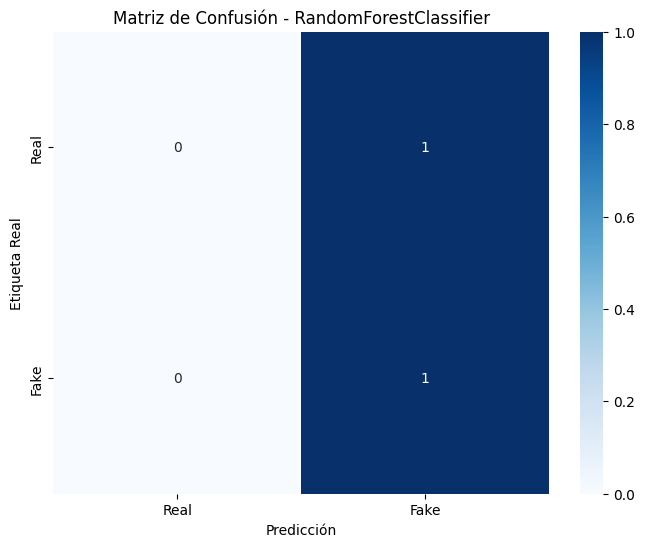

Resultados para el modelo: LogisticRegression
Accuracy: 0.5000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



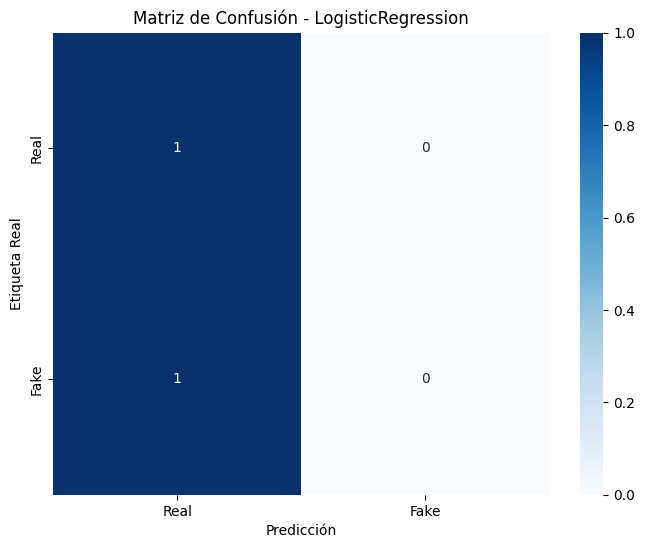

Resultados para el modelo: GradientBoostingClassifier
Accuracy: 0.0000
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
AUC-ROC: 0.0000

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



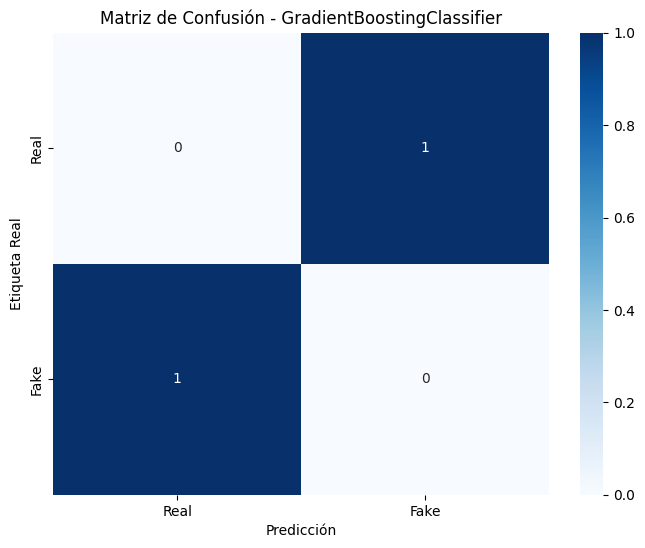

In [7]:
# =============================================
# 2. PIPELINE DE DETECCIÓN DE FAKE NEWS
# =============================================

def fake_news_detection_pipeline(X, y, model):
    """
    Pipeline completo para la detección de fake news
    """
    # 1. Dividir datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # 2. Extracción de características
    feature_extractor = AdvancedFeatureExtractor()
    X_train_features = feature_extractor.fit_transform(X_train)
    X_test_features = feature_extractor.transform(X_test)

    # 3. Entrenamiento del modelo
    model.fit(X_train_features, y_train)

    # 4. Predicción y evaluación
    y_pred = model.predict(X_test_features)
    y_pred_proba = model.predict_proba(X_test_features)[:, 1]

    print(f"Resultados para el modelo: {model.__class__.__name__}")
    print("="*40)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Matriz de Confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'Matriz de Confusión - {model.__class__.__name__}')
    plt.xlabel('Predicción')
    plt.ylabel('Etiqueta Real')
    plt.show()

# =============================================
# 3. EJECUCIÓN CON DATOS DE EJEMPLO
# =============================================

# Crear un DataFrame de ejemplo
data = {
    'text': [
        "BREAKING: Scientists discover a new planet in our solar system!",
        "URGENT: You won't believe what this celebrity said about the government.",
        "The stock market is expected to remain stable for the next quarter.",
        "A new study shows that eating chocolate every day is good for your health.",
        "The government is hiding the truth about aliens! #conspiracy",
        "This one weird trick will help you lose weight in just one week!",
        "The local library will be hosting a book fair next month.",
        "SHOCKING: The earth is actually flat, and NASA is lying to us.",
        "The president announced a new plan to improve education.",
        "The cure for cancer has been found, but the government is hiding it."
    ],
    'label': [0, 1, 0, 1, 1, 1, 0, 1, 0, 1]  # 0: Real, 1: Fake
}

df = pd.DataFrame(data)

# Ejecutar el pipeline con diferentes modelos
models = [
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    LogisticRegression(random_state=42, class_weight='balanced'),
    GradientBoostingClassifier(n_estimators=100, random_state=42)
]

for model in models:
    fake_news_detection_pipeline(df['text'], df['label'], model)

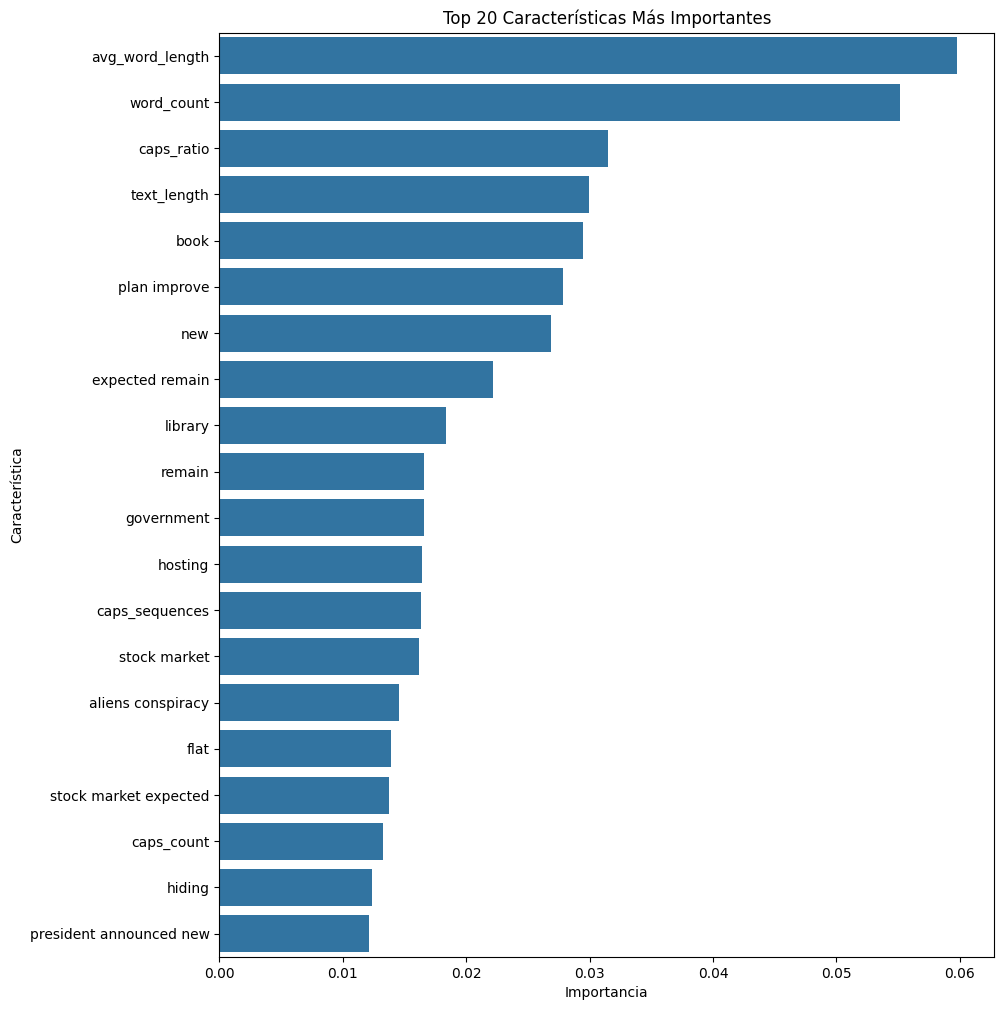

In [6]:
# =============================================
# 4. ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
# =============================================

# Obtener los nombres de las características
feature_extractor = AdvancedFeatureExtractor()
feature_extractor.fit(df['text'])
tfidf_feature_names = feature_extractor.vectorizer.get_feature_names_out()
linguistic_feature_names = list(feature_extractor.extract_linguistic_features(df['text']).columns)
feature_names = list(tfidf_feature_names) + linguistic_feature_names

# Entrenar el modelo en todos los datos para obtener importancias más estables
X_features = feature_extractor.fit_transform(df['text'])
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_features, df['label'])

# Obtener y mostrar las importancias
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20))
plt.title('Top 20 Características Más Importantes')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

In [8]:
# Cargar los datasets
fake_df = pd.read_csv('Fake.csv')
true_df = pd.read_csv('True.csv')

# Añadir una columna de etiquetas (1 para fake, 0 para real)
fake_df['label'] = 1
true_df['label'] = 0

# Combinar los dataframes
df_large = pd.concat([fake_df, true_df], ignore_index=True)

# Mezclar el dataset
df_large = df_large.sample(frac=1, random_state=42).reset_index(drop=True)

# Mostrar información del nuevo dataset
print(df_large.info())
print("\nDistribución de etiquetas:")
print(df_large['label'].value_counts())

# Ejecutar el pipeline con el nuevo dataset y el modelo RandomForest
fake_news_detection_pipeline(df_large['text'], df_large['label'], RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))

FileNotFoundError: [Errno 2] No such file or directory: 'Fake.csv'